# Análise do registro de atos do e-SAJ
José Eduardo de Souza Pimentel

https://github.com/jespimentel


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

atos = pd.read_csv ('./atos.csv', sep = ';', encoding='ISO-8859-1', error_bad_lines=False,low_memory = False)

In [ ]:
atos.head()

In [2]:
# Análise dos dados

pd.set_option('display.max_rows', 999)
data_inicial = atos['Data da intimação'][len(atos)-1]
data_final = atos['Data da intimação'][0]
periodo = ': ' + str(data_inicial) + ' - ' + str(data_final)
n_recebidos_por_pj = atos.groupby('Recebido por')['Número do processo'].count().sort_values()
n_recebidos_por_cargo = atos.groupby('Cargo')['Número do processo'].count().sort_values()
n_recebidos_por_especializacao = atos.groupby('Especialização')['Número do processo'].count().sort_values()
disponibilizacao_por_vara = atos.groupby('Vara')['Número do processo'].count().sort_values()
processos_em_tramite_por_vara = atos.groupby('Vara')['Número do processo'].nunique().sort_values()
classes_por_vara = atos.groupby(['Vara','Classe principal'])['Classe principal'].count()
classes_por_cargo = atos.groupby(['Cargo','Classe principal'])['Classe principal'].count()

#Implementação futura: 
#selecao = (atos['Classe principal'] == 'Medidas Protetivas de urgência (Lei Maria da Penha) Criminal') & (atos['Prazo processual']== '1 dias')
#medidas_protetivas_por_data_e_vara = atos[selecao].groupby(['Disponibilização','Vara'])['Vara'].count().unstack().fillna(0)

In [3]:
# Criação do relatório de análise
relatorio = 'ANÁLISE DOS DADOS DO eSAJ\n'
relatorio += 'https://github.com/jespimentel\n------------------------\n\n'
relatorio += 'Período de análise considerado\n' +'Data inicial: ' + str(data_inicial) + '\nData final  : ' + str(data_final) + '\n\n'
relatorio += '------------------------\n\n'
relatorio += 'Número de feitos recebidos por PJ\n' + str(n_recebidos_por_pj) + '\n\n'
relatorio += 'Número de feitos recebidos por cargo\n' + str(n_recebidos_por_cargo) + '\n\n'
relatorio += 'Número de feitos recebidos por especialização\n' + str(n_recebidos_por_especializacao) + '\n\n'
relatorio += 'Número de feitos disponibilizados para o MP por vara\n' + str(disponibilizacao_por_vara) + '\n\n'
relatorio += 'Feitos disponibilizados para o MP por vara, excluídos os retornos\n' + str(processos_em_tramite_por_vara) + '\n\n'
relatorio += 'Classes processuais recebidas por cargo\n' + str(classes_por_cargo) + '\n\n'
relatorio += 'Classes processuais recebidas pelo MP por vara\n' + str(classes_por_vara) + '\n\n'
arquivo = open('eSAJ_relatorio.txt','w')
arquivo.write (relatorio)
arquivo.close()

In [ ]:
plt.style.use ('fivethirtyeight')
plt.title ('Top 30 - Recebidos por Promotor de Justiça' + periodo)
n_recebidos_por_pj.tail(30).plot.barh(figsize = [10, 8])
plt.savefig('01_recebidos_por_pj.jpg', dpi = 300, bbox_inches='tight')
plt.show()

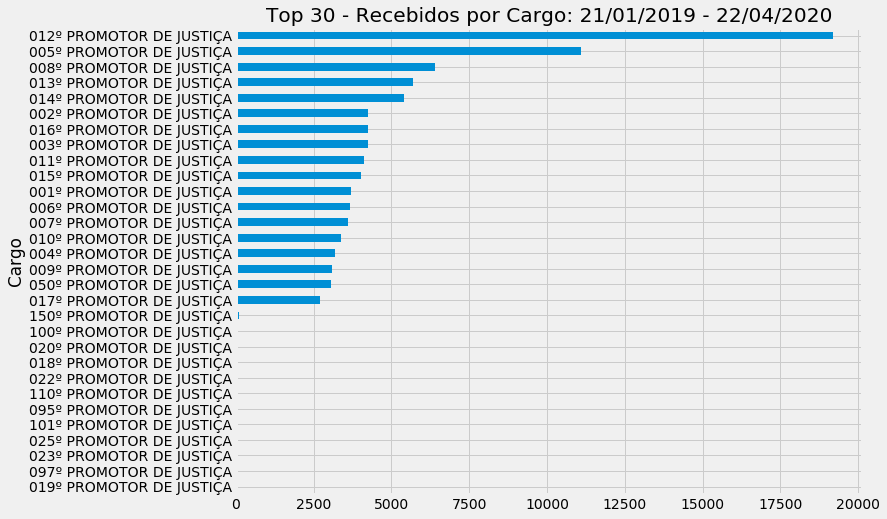

In [4]:
plt.style.use ('fivethirtyeight')
plt.title ('Top 30 - Recebidos por Cargo' + periodo)
n_recebidos_por_cargo.tail(30).plot.barh(figsize = [10, 8])
plt.savefig('02_recebidos_por_cargo.jpg', dpi = 300, bbox_inches='tight')
plt.show()

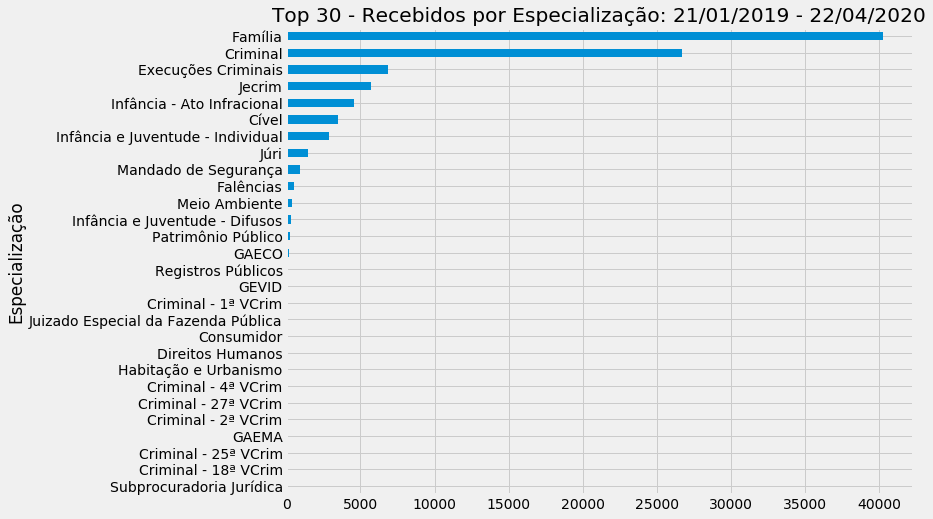

In [5]:
plt.style.use ('fivethirtyeight')
plt.title ('Top 30 - Recebidos por Especialização' + periodo)
n_recebidos_por_especializacao.tail(30).plot.barh(figsize = [10, 8])
plt.savefig('03_recebidos_por_especializacao.jpg', dpi = 300, bbox_inches='tight')
plt.show()

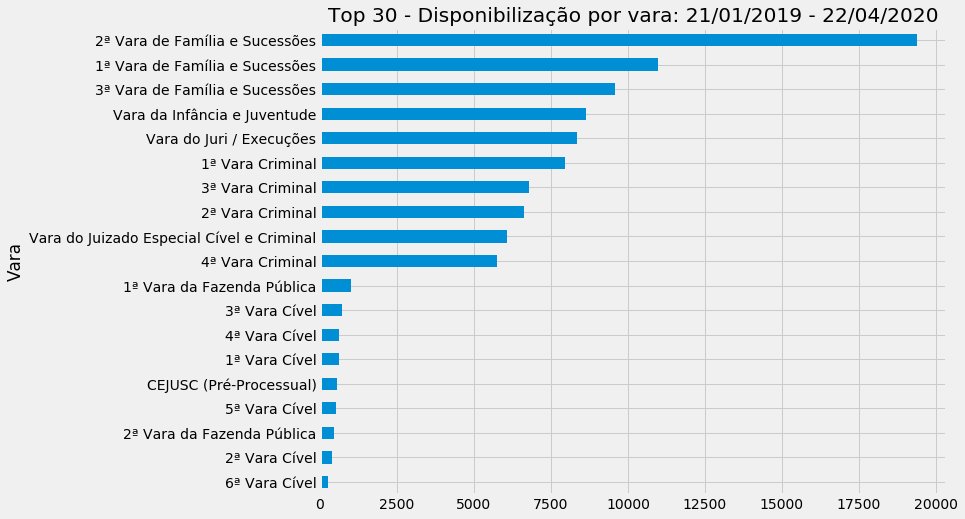

In [6]:
plt.style.use ('fivethirtyeight')
plt.title ('Top 30 - Disponibilização por vara' + periodo)
disponibilizacao_por_vara.tail(30).plot.barh(figsize = [10, 8])
plt.savefig('04_disponibilizados_por_vara.jpg', dpi = 300, bbox_inches='tight')
plt.show()

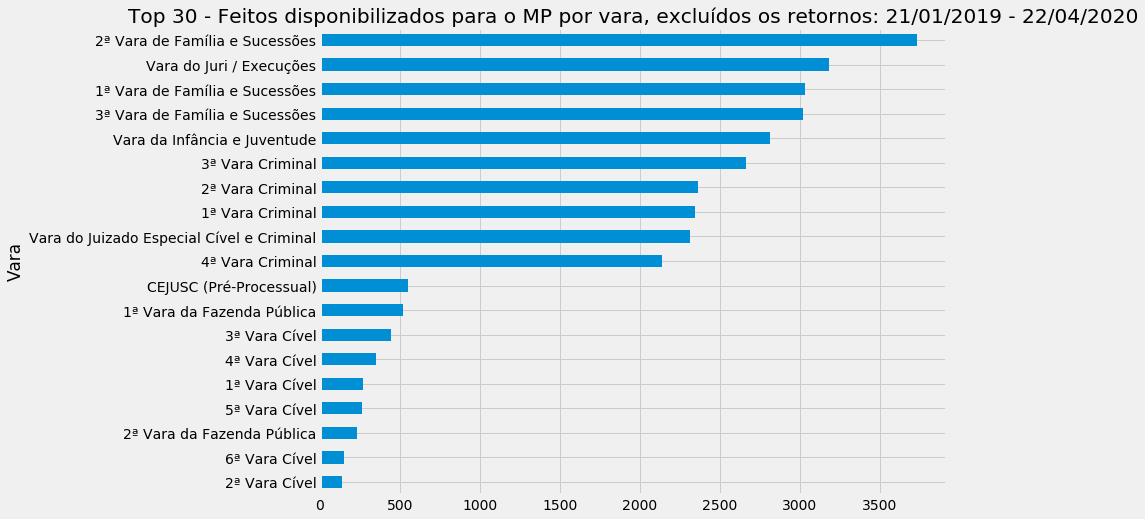

In [7]:
plt.style.use ('fivethirtyeight')
plt.title ('Top 30 - Feitos disponibilizados para o MP por vara, excluídos os retornos' + periodo)
processos_em_tramite_por_vara.tail(30).plot.barh(figsize = [10, 8])
plt.savefig('05_proc_em_tramite_por_vara.jpg', dpi = 300, bbox_inches='tight')
plt.show()

In [ ]:
print(relatorio)